# RMSE Analysis

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import datetime as dt
import netCDF4 as cdf
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pylab as plb
from tm5tools import globarea
import calendar
from math import sqrt
import pickle
from __future__ import division

# For optimized fires look at the older version of this notebook

In [25]:
#Reading dataframes
# Santarem
df_san_fire      = pd.read_pickle('San_RMSE_fire')
#df_san_fire_opti = pd.read_pickle('San_RMSE_opti_fire')
df_san_all       = pd.read_pickle('San_RMSE_all')
#df_san_all_opti  = pd.read_pickle('San_RMSE_opti_all')
df_san_wet       = pd.read_pickle('San_RMSE_wet')
#df_san_wet_opti  = pd.read_pickle('San_RMSE_opti_wet')


# Tabatinga
df_tab_fire      = pd.read_pickle('Tab_RMSE_fire')
#df_tab_fire_opti = pd.read_pickle('Tab_RMSE_opti_fire')
df_tab_all       = pd.read_pickle('Tab_RMSE_all')
#df_tab_all_opti  = pd.read_pickle('Tab_RMSE_opti_all')
df_tab_wet       = pd.read_pickle('Tab_RMSE_wet')
#df_tab_wet_opti  = pd.read_pickle('Tab_RMSE_opti_wet')


# Alta Floresta
df_alf_fire      = pd.read_pickle('Alf_RMSE_fire')
#df_alf_fire_opti = pd.read_pickle('Alf_RMSE_opti_fire')
df_alf_all       = pd.read_pickle('Alf_RMSE_all')
#df_alf_all_opti  = pd.read_pickle('Alf_RMSE_opti_all')
df_alf_wet       = pd.read_pickle('Alf_RMSE_wet')
#df_alf_wet_opti  = pd.read_pickle('Alf_RMSE_opti_wet')

#Rio Branco
df_rbo_fire      = pd.read_pickle('Rbo_RMSE_fire')
#df_rbo_fire_opti = pd.read_pickle('Rbo_RMSE_opti_fire')
df_rbo_all       = pd.read_pickle('Rbo_RMSE_all')
#df_rbo_all_opti  = pd.read_pickle('Rbo_RMSE_opti_all')
df_rbo_wet       = pd.read_pickle('Rbo_RMSE_wet')
#df_rbo_wet_opti  = pd.read_pickle('Rbo_RMSE_opti_wet')

# CO$_2$ RMSD Analysis

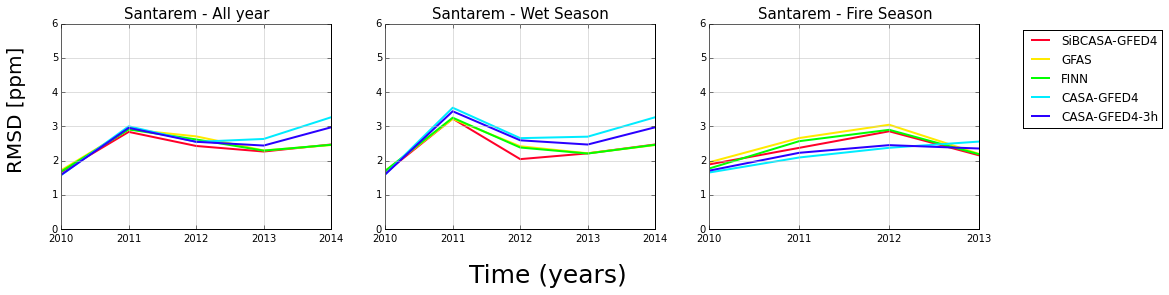

In [26]:
fig,axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,8))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.75, 'RMSD [ppm]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.45, 'Time (years)', ha='center',fontsize=25)
colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))

for ind, i in enumerate(df_san_all.T.columns):
    ax1 = plt.subplot(231)
    ax1.plot([2010,2011,2012,2013,2014],df_san_all.loc[:,'2010':'2014'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax1.ticklabel_format(useOffset=False)
    ax1.set_title('Santarem - All year',fontsize=15)
    ax1.set_ylim(0,6)
    
    plt.xticks(np.arange(2010, 2015, 1.0))    
    plt.grid(True, ls='-', color='0.75')
for ind, i in enumerate(df_san_wet.T.columns):
    ax2 = plt.subplot(232)
    ax2.plot([2010,2011,2012,2013,2014],df_san_wet.loc[:,'2010':'2014'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax2.ticklabel_format(useOffset=False)
    ax2.set_title('Santarem - Wet Season',fontsize=15)
    ax2.set_ylim(0,6)
    
    plt.xticks(np.arange(2010, 2015, 1.0))
    plt.grid(True, ls='-', color='0.75')
for ind, i in enumerate(df_san_fire.T.columns):
    ax3 = plt.subplot(233)
    ax3.plot([2010,2011,2012,2013],df_san_fire.loc[:,'2010':'2013'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax3.ticklabel_format(useOffset=False)
    ax3.set_title('Santarem - Fire Season',fontsize=15)
    ax3.set_ylim(0,6)
    plt.xticks(np.arange(2010, 2014, 1.0))
    plt.grid(True, ls='-', color='0.75')
    
plt.legend(bbox_to_anchor = (1.7,1))
fig.savefig('San_RMSD.png',bbox_inches='tight',DPI=1000)

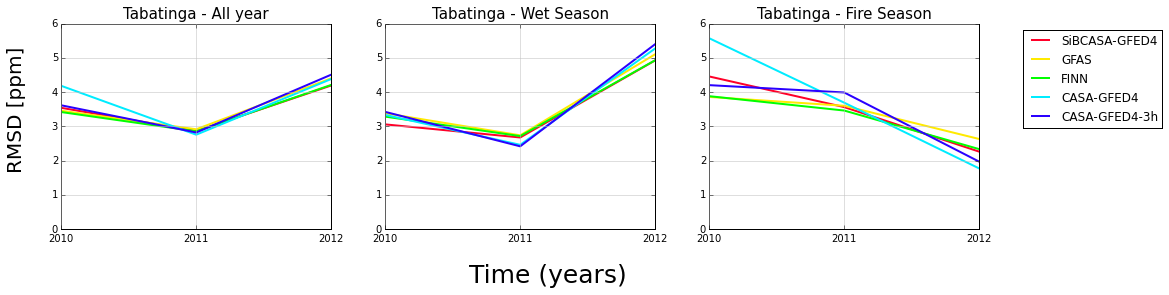

In [27]:
fig,axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,8))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.75, 'RMSD [ppm]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.45, 'Time (years)', ha='center',fontsize=25)
colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))

for ind, i in enumerate(df_tab_all.T.columns):
    ax1 = plt.subplot(231)
    ax1.plot([2010,2011,2012],df_tab_all.loc[:,'2010':'2012'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax1.ticklabel_format(useOffset=False)
    ax1.set_title('Tabatinga - All year',fontsize=15)
    ax1.set_ylim(0,6)
    
    plt.xticks(np.arange(2010, 2013, 1.0))    
    plt.grid(True, ls='-', color='0.75')
for ind, i in enumerate(df_tab_wet.T.columns):
    ax2 = plt.subplot(232)
    ax2.plot([2010,2011,2012],df_tab_wet.loc[:,'2010':'2012'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax2.ticklabel_format(useOffset=False)
    ax2.set_title('Tabatinga - Wet Season',fontsize=15)
    ax2.set_ylim(0,6)
    
    plt.xticks(np.arange(2010, 2013, 1.0))
    plt.grid(True, ls='-', color='0.75')
for ind, i in enumerate(df_tab_fire.T.columns):
    ax3 = plt.subplot(233)
    ax3.plot([2010,2011,2012],df_tab_fire.loc[:,'2010':'2012'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax3.set_ylim(0,6)
    ax3.ticklabel_format(useOffset=False)
    ax3.set_title('Tabatinga - Fire Season',fontsize=15)
    
    plt.xticks(np.arange(2010, 2013, 1.0))
    plt.grid(True, ls='-', color='0.75')
    
plt.legend(bbox_to_anchor = (1.7,1))
fig.savefig('Tab_RMSD.png',bbox_inches='tight',DPI=1000)

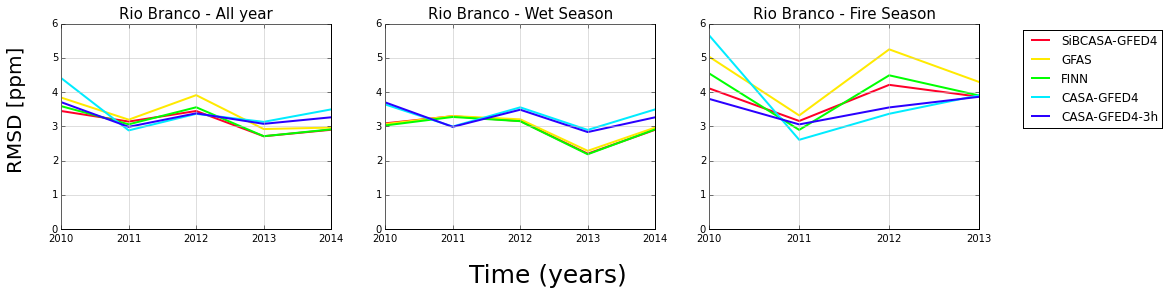

In [28]:
fig,axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,8))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.75, 'RMSD [ppm]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.45, 'Time (years)', ha='center',fontsize=25)
colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))

for ind, i in enumerate(df_rbo_all.T.columns):
    ax1 = plt.subplot(231)
    ax1.plot([2010,2011,2012,2013,2014],df_rbo_all.loc[:,'2010':'2014'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax1.ticklabel_format(useOffset=False)
    ax1.set_title('Rio Branco - All year',fontsize=15)
    ax1.set_ylim(0,6)
    
    plt.xticks(np.arange(2010, 2015, 1.0))    
    plt.grid(True, ls='-', color='0.75')
for ind, i in enumerate(df_rbo_wet.T.columns):
    ax2 = plt.subplot(232)
    ax2.plot([2010,2011,2012,2013,2014],df_rbo_wet.loc[:,'2010':'2014'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax2.ticklabel_format(useOffset=False)
    ax2.set_title('Rio Branco - Wet Season',fontsize=15)
    ax2.set_ylim(0,6)
    
    plt.xticks(np.arange(2010, 2015, 1.0))
    plt.grid(True, ls='-', color='0.75')
for ind, i in enumerate(df_rbo_fire.T.columns):
    ax3 = plt.subplot(233)
    ax3.plot([2010,2011,2012,2013],df_rbo_fire.loc[:,'2010':'2013'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax3.ticklabel_format(useOffset=False)
    ax3.set_title('Rio Branco - Fire Season',fontsize=15)
    ax3.set_ylim(0,6)
    plt.xticks(np.arange(2010, 2014, 1.0))
    plt.grid(True, ls='-', color='0.75')
    
plt.legend(bbox_to_anchor = (1.7,1))
fig.savefig('Rbo_RMSD.png',bbox_inches='tight',DPI=1000)

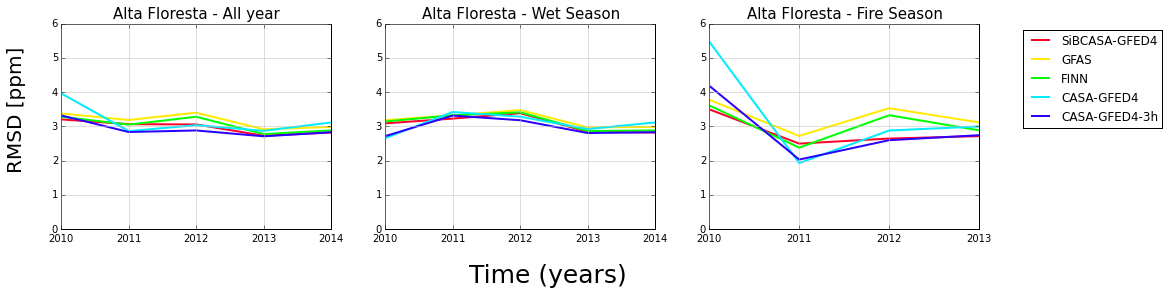

In [24]:
fig,axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,8))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.75, 'RMSD [ppm]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.45, 'Time (years)', ha='center',fontsize=25)
colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))

for ind, i in enumerate(df_alf_all.T.columns):
    ax1 = plt.subplot(231)
    ax1.plot([2010,2011,2012,2013,2014],df_alf_all.loc[:,'2010':'2014'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax1.ticklabel_format(useOffset=False)
    ax1.set_title('Alta Floresta - All year',fontsize=15)
    ax1.set_ylim(0,6)
    
    plt.xticks(np.arange(2010, 2015, 1.0))    
    plt.grid(True, ls='-', color='0.75')
for ind, i in enumerate(df_alf_wet.T.columns):
    ax2 = plt.subplot(232)
    ax2.plot([2010,2011,2012,2013,2014],df_alf_wet.loc[:,'2010':'2014'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax2.ticklabel_format(useOffset=False)
    ax2.set_title('Alta Floresta - Wet Season',fontsize=15)
    ax2.set_ylim(0,6)
    
    plt.xticks(np.arange(2010, 2015, 1.0))
    plt.grid(True, ls='-', color='0.75')
for ind, i in enumerate(df_alf_fire.T.columns):
    ax3 = plt.subplot(233)
    ax3.plot([2010,2011,2012,2013],df_alf_fire.loc[:,'2010':'2013'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax3.ticklabel_format(useOffset=False)
    ax3.set_title('Alta Floresta - Fire Season',fontsize=15)
    ax3.set_ylim(0,6)
    plt.xticks(np.arange(2010, 2014, 1.0))
    plt.grid(True, ls='-', color='0.75')
    
plt.legend(bbox_to_anchor = (1.7,1))
fig.savefig('Alf_RMSD.png',bbox_inches='tight',DPI=1000)

# CO FORWARD SIMULATIONS RMSD VISUALISATION

In [29]:
#Reading dataframes
# Santarem
df_sanCO_fire      = pd.read_pickle('SanCO_RMSE_fire')
df_sanCO_all       = pd.read_pickle('SanCO_RMSE_all')
df_sanCO_wet       = pd.read_pickle('SanCO_RMSE_wet')

# Tabatinga
df_tabCO_fire      = pd.read_pickle('TabCO_RMSE_fire')
df_tabCO_all       = pd.read_pickle('TabCO_RMSE_all')
df_tabCO_wet       = pd.read_pickle('TabCO_RMSE_wet')
df_tabCO_all       = df_tabCO_all.drop(['CASA-GFED4-3h'])
df_tabCO_fire      = df_tabCO_fire.drop(['CASA-GFED4-3h'])
df_tabCO_wet       = df_tabCO_wet.drop(['CASA-GFED4-3h'])

# Alta Floresta
df_alfCO_fire      = pd.read_pickle('AlfCO_RMSE_fire')
df_alfCO_all       = pd.read_pickle('AlfCO_RMSE_all')
df_alfCO_wet       = pd.read_pickle('AlfCO_RMSE_wet')
df_alfCO_all       = df_alfCO_all.drop(['CASA-GFED4-3h'])
df_alfCO_fire      = df_alfCO_fire.drop(['CASA-GFED4-3h'])
df_alfCO_wet       = df_alfCO_wet.drop(['CASA-GFED4-3h'])

# Rio Branco
df_rboCO_fire      = pd.read_pickle('RboCO_RMSE_fire')
df_rboCO_all       = pd.read_pickle('RboCO_RMSE_all')
df_rboCO_wet       = pd.read_pickle('RboCO_RMSE_wet')


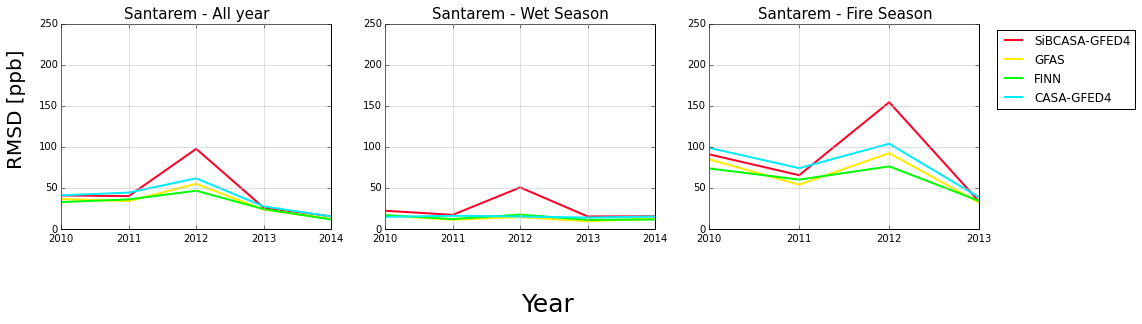

In [40]:
fig,axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,8))

subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.75, 'RMSD [ppb]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.4, 'Year', ha='center',fontsize=25)

for ind, i in enumerate(df_sanCO_all.T.columns):
    ax1 = plt.subplot(231)
    ax1.plot([2010,2011,2012,2013,2014],df_sanCO_all.loc[:,'2010':'2014'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax1.ticklabel_format(useOffset=False)
    ax1.set_title('Santarem - All year',fontsize=15)
    ax1.set_ylim(0,250)
    
    plt.xticks(np.arange(2010, 2015, 1.0))    
    plt.grid(True, ls='-', color='0.75')
for ind, i in enumerate(df_sanCO_wet.T.columns):
    ax2 = plt.subplot(232)
    ax2.plot([2010,2011,2012,2013,2014],df_sanCO_wet.loc[:,'2010':'2014'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax2.ticklabel_format(useOffset=False)
    ax2.set_title('Santarem - Wet Season',fontsize=15)
    ax2.set_ylim(0,250)
    
    plt.xticks(np.arange(2010, 2015, 1.0))
    plt.grid(True, ls='-', color='0.75')
for ind, i in enumerate(df_sanCO_fire.T.columns):
    ax3 = plt.subplot(233)
    ax3.plot([2010,2011,2012,2013],df_sanCO_fire.loc[:,'2010':'2013'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax3.set_ylim(0,250)
    ax3.ticklabel_format(useOffset=False)
    ax3.set_title('Santarem - Fire Season',fontsize=15)
    plt.xticks(np.arange(2010, 2014, 1.0))
    plt.grid(True, ls='-', color='0.75')
    
plt.legend(bbox_to_anchor = (1.6,1))
fig.savefig('SANCO_RMSD.png',bbox_inches='tight',DPI=1000)

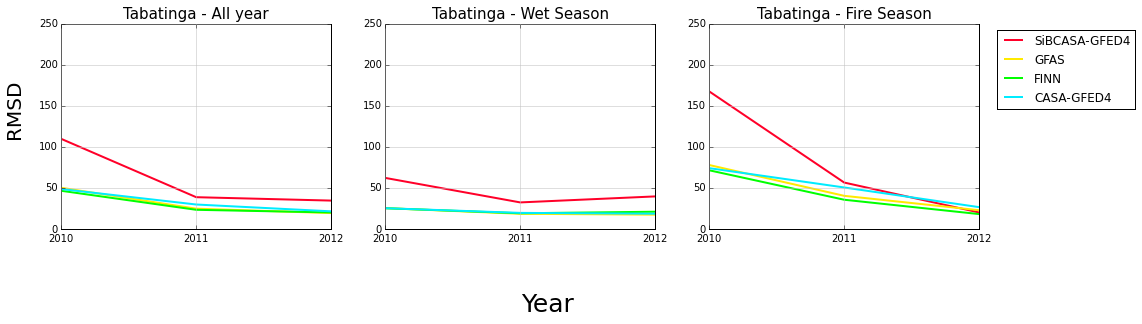

In [41]:
fig,axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,8))

subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.75, 'RMSD', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.4, 'Year', ha='center',fontsize=25)

for ind, i in enumerate(df_tabCO_all.T.columns):
    ax1 = plt.subplot(231)
    ax1.plot([2010,2011,2012],df_tabCO_all.loc[:,'2010':'2012'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax1.ticklabel_format(useOffset=False)
    ax1.set_title('Tabatinga - All year',fontsize=15)
    ax1.set_ylim(0,250) 
    plt.xticks(np.arange(2010, 2013, 1.0))    
    plt.grid(True, ls='-', color='0.75')
for ind, i in enumerate(df_tabCO_wet.T.columns):
    ax2 = plt.subplot(232)
    ax2.plot([2010,2011,2012],df_tabCO_wet.loc[:,'2010':'2012'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax2.ticklabel_format(useOffset=False)
    ax2.set_title('Tabatinga - Wet Season',fontsize=15)
    ax2.set_ylim(0,250)
    plt.xticks(np.arange(2010, 2013, 1.0))
    plt.grid(True, ls='-', color='0.75')
for ind, i in enumerate(df_tabCO_fire.T.columns):
    ax3 = plt.subplot(233)
    ax3.plot([2010,2011,2012],df_tabCO_fire.loc[:,'2010':'2012'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax3.set_ylim(0,250)
    ax3.ticklabel_format(useOffset=False)
    ax3.set_title('Tabatinga - Fire Season',fontsize=15)
    
    plt.xticks(np.arange(2010, 2013, 1.0))
    plt.grid(True, ls='-', color='0.75')
    
plt.legend(bbox_to_anchor = (1.6,1))
fig.savefig('TABCO_RMSD.png',bbox_inches='tight',DPI=1000)

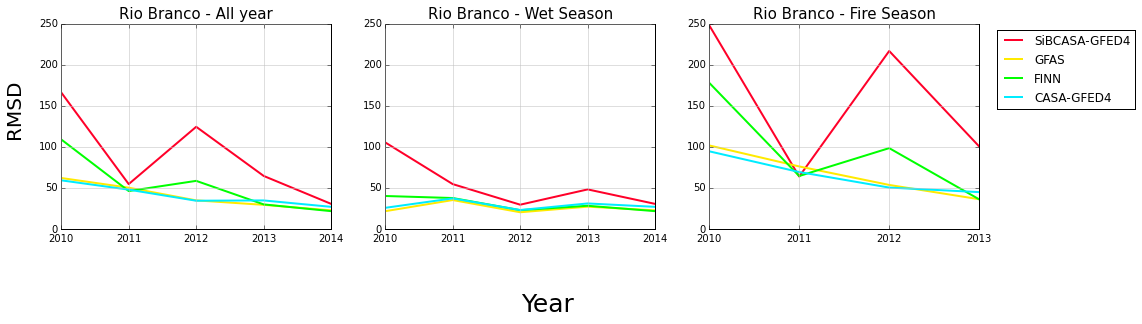

In [42]:
fig,axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,8))

subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.75, 'RMSD', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.4, 'Year', ha='center',fontsize=25)

for ind, i in enumerate(df_rboCO_all.T.columns):
    ax1 = plt.subplot(231)
    ax1.plot([2010,2011,2012,2013,2014],df_rboCO_all.loc[:,'2010':'2014'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax1.ticklabel_format(useOffset=False)
    ax1.set_title('Rio Branco - All year',fontsize=15)
    ax1.set_ylim(0,250)
    
    plt.xticks(np.arange(2010, 2015, 1.0))    
    plt.grid(True, ls='-', color='0.75')
for ind, i in enumerate(df_rboCO_wet.T.columns):
    ax2 = plt.subplot(232)
    ax2.plot([2010,2011,2012,2013,2014],df_rboCO_wet.loc[:,'2010':'2014'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax2.ticklabel_format(useOffset=False)
    ax2.set_title('Rio Branco - Wet Season',fontsize=15)
    ax2.set_ylim(0,250)
    
    plt.xticks(np.arange(2010, 2015, 1.0))
    plt.grid(True, ls='-', color='0.75')
for ind, i in enumerate(df_rboCO_fire.T.columns):
    ax3 = plt.subplot(233)
    ax3.plot([2010,2011,2012,2013],df_rboCO_fire.loc[:,'2010':'2013'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax3.set_ylim(0,250)
    ax3.ticklabel_format(useOffset=False)
    ax3.set_title('Rio Branco - Fire Season',fontsize=15)
    
    plt.xticks(np.arange(2010, 2014, 1.0))
    plt.grid(True, ls='-', color='0.75')
    
plt.legend(bbox_to_anchor = (1.6,1))
fig.savefig('RBOCO_RMSD.png',bbox_inches='tight',DPI=1000)

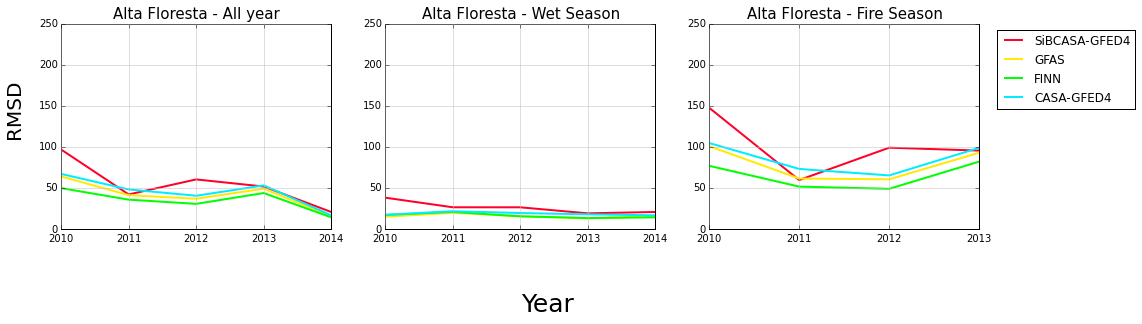

In [43]:
fig,axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,8))

subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.75, 'RMSD', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.4, 'Year', ha='center',fontsize=25)

for ind, i in enumerate(df_alfCO_all.T.columns):
    ax1 = plt.subplot(231)
    ax1.plot([2010,2011,2012,2013,2014],df_alfCO_all.loc[:,'2010':'2014'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax1.ticklabel_format(useOffset=False)
    ax1.set_title('Alta Floresta - All year',fontsize=15)
    ax1.set_ylim(0,250)
    
    plt.xticks(np.arange(2010, 2015, 1.0))    
    plt.grid(True, ls='-', color='0.75')
for ind, i in enumerate(df_alfCO_wet.T.columns):
    ax2 = plt.subplot(232)
    ax2.plot([2010,2011,2012,2013,2014],df_alfCO_wet.loc[:,'2010':'2014'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax2.ticklabel_format(useOffset=False)
    ax2.set_title('Alta Floresta - Wet Season',fontsize=15)
    ax2.set_ylim(0,250)
    
    plt.xticks(np.arange(2010, 2015, 1.0))
    plt.grid(True, ls='-', color='0.75')
for ind, i in enumerate(df_alfCO_fire.T.columns):
    ax3 = plt.subplot(233)
    ax3.plot([2010,2011,2012,2013],df_alfCO_fire.loc[:,'2010':'2013'].T[i].values,label=i,linewidth=2,color=colors[ind])
    ax3.set_ylim(0,250)
    ax3.ticklabel_format(useOffset=False)
    ax3.set_title('Alta Floresta - Fire Season',fontsize=15)
    
    plt.xticks(np.arange(2010, 2014, 1.0))
    plt.grid(True, ls='-', color='0.75')
    
plt.legend(bbox_to_anchor = (1.6,1))
fig.savefig('ALFCO_RMSD.png',bbox_inches='tight',DPI=1000)

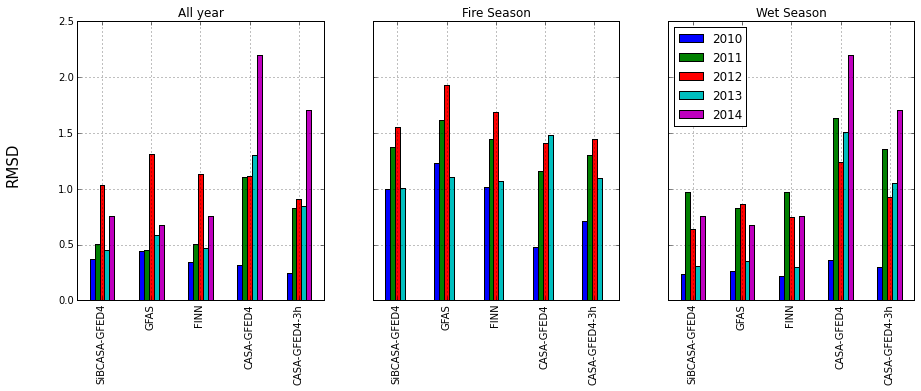

In [58]:


fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15,5))
fig.text(0.06, 0.5, 'RMSD', va='center', rotation='vertical',fontsize=15)

#tofill = trop_forest_df.copy()
#tofill.at[:,'SiBCASA_GFED4'] = 0
#tofill.at[:,'GFAS'] = 0
#ofill.at[:,'FINN'] = 0
#tofill.at[:,'CASA_GFED4'] = 0

ax1 = df_san_all.plot(kind='bar',title='All year',ax=axes[0], legend=False)
ax2 = df_san_fire.plot(kind='bar',title='Fire Season', ax=axes[1], legend=False)
ax3 = df_san_wet.plot(kind='bar', title='Wet Season',ax=axes[2], legend=True)



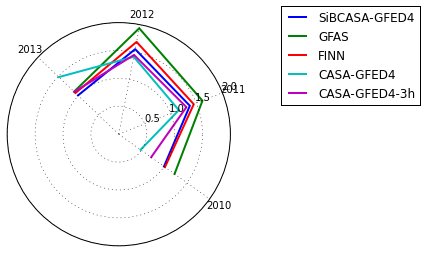

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

n = len(df_san_fire.columns)

# convert from hours to rad
angle = np.linspace(0,2*np.pi,n)
# looping through the columns and manually select one category
for ind, i in enumerate(df_san_fire.T.columns):
    ax.plot([2010,2011,2012,2013],df_san_fire.loc[:,'2010':'2013'].T[i].values,label=i,linewidth=2)
    #ax.plot(angle,df_san_fire.T[i].values,label=i,linewidth=2)

# set the labels
#ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticks([2010,2011,2012,2013])
ax.set_xticklabels(range(2010,2014))

# make the legend
ax.legend(loc='upper left', bbox_to_anchor = (1.2,1.1))
plt.show()

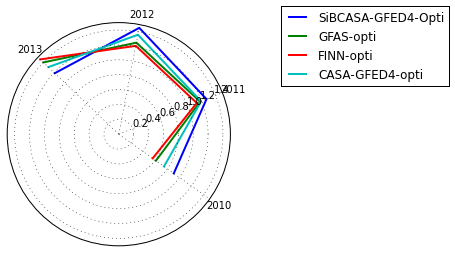

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

n = len(df_san_fire.columns)

# convert from hours to rad
angle = np.linspace(0,2*np.pi,n)
# looping through the columns and manually select one category
for ind, i in enumerate(df_san_fire_opti.T.columns):
    ax.plot([2010,2011,2012,2013],df_san_fire_opti.loc[:,'2010':'2013'].T[i].values,label=i,linewidth=2)
    #ax.plot(angle,df_san_fire.T[i].values,label=i,linewidth=2)

# set the labels
#ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticks([2010,2011,2012,2013])
ax.set_xticklabels(range(2010,2014))

# make the legend
ax.legend(loc='upper left', bbox_to_anchor = (1.2,1.1))
plt.show()

In [64]:
df_san_fire.T.columns
df_san_fire.index

Index([u'SiBCASA-GFED4', u'GFAS', u'FINN', u'CASA-GFED4', u'CASA-GFED4-3h'], dtype='object')